# Task 1: Classification

In [9]:
# Install essential libraries (Uncomment if needed for installation)
#import sys
#!{sys.executable} -m pip install pandas numpy matplotlib seaborn scipy scikit-learn jupyter-summarytools

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from summarytools import dfSummary
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

#### Loading Data And Initial Inspection

In [11]:
#importing dataset
df = pd.read_csv('garments_worker_productivity.csv', parse_dates=['date'])
df.shape

(1197, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [16]:
# Checking Null Values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [18]:
#Correcting DataTypes as we understand from Bussiness Study
# Convert categorical columns
categorical_columns = ['quarter', 'department', 'day', 'team', 'no_of_style_change']
for col in categorical_columns:
    df[col] = df[col].astype('O')
# Check updated data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   object        
 13  no_

In [20]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


#### Statistical Analysis

In [23]:
df.describe()

,date,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
min,2015-01-01 00:00:00,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437
std,NaN,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488


# Exploratory Data Analysis

In [26]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['date', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

We have 5 categorical features : ['quarter', 'department', 'day', 'team', 'no_of_style_change']


In [28]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

quarter
Quarter1    30.075188
Quarter2    27.986633
Quarter4    20.718463
Quarter3    17.543860
Quarter5     3.675856
Name: proportion, dtype: float64
---------------------------
department
sweing        57.727652
finishing     21.470343
finishing     20.802005
Name: proportion, dtype: float64
---------------------------
day
Wednesday    17.376775
Sunday       16.959064
Tuesday      16.791980
Thursday     16.624896
Monday       16.624896
Saturday     15.622389
Name: proportion, dtype: float64
---------------------------
team
8     9.106099
2     9.106099
1     8.771930
4     8.771930
9     8.688388
10    8.354219
12    8.270677
7     8.020050
3     7.936508
6     7.852966
5     7.769424
11    7.351713
Name: proportion, dtype: float64
---------------------------
no_of_style_change
0    87.719298
1     9.523810
2     2.756892
Name: proportion, dtype: float64
---------------------------


In [30]:
# Filter the data for Quarter5 (as a string)
df_q = df[df['quarter'] == 'Quarter5']

# Print the shape and indices of the filtered DataFrame
print(df_q.shape)
print(df_q.index)

# Optional: Print the unique dates in Quarter5
print(df_q['date'].unique())


(44, 15)
Index([498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511,
       512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
       526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541],
      dtype='int64')
<DatetimeArray>
['2015-01-29 00:00:00', '2015-01-31 00:00:00']
Length: 2, dtype: datetime64[ns]


It was needed to sort this Human Error for furthur analysis.

In [33]:
df['department'] = df['department'].str.strip()
df['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

#### Distribution of Categorical features

Univariate Analysis for Feature: quarter


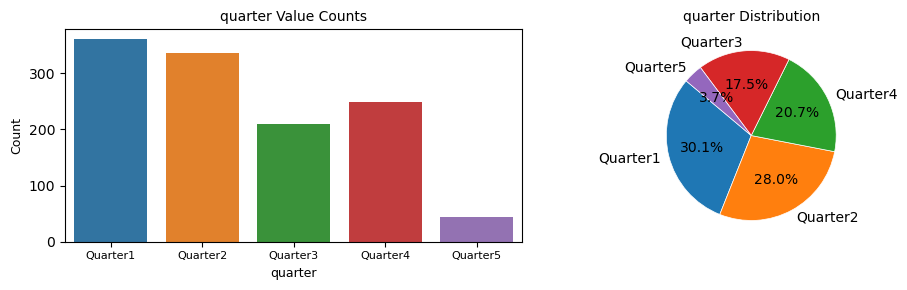

--------------------------------------------------
Univariate Analysis for Feature: department


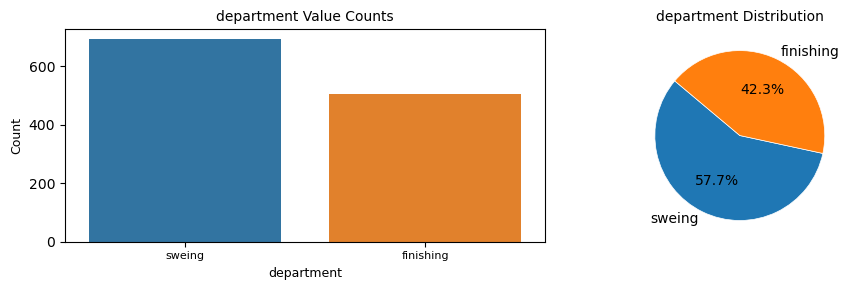

--------------------------------------------------
Univariate Analysis for Feature: day


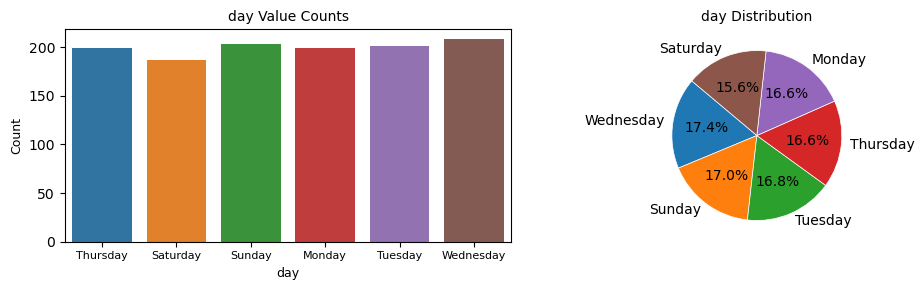

--------------------------------------------------
Univariate Analysis for Feature: team


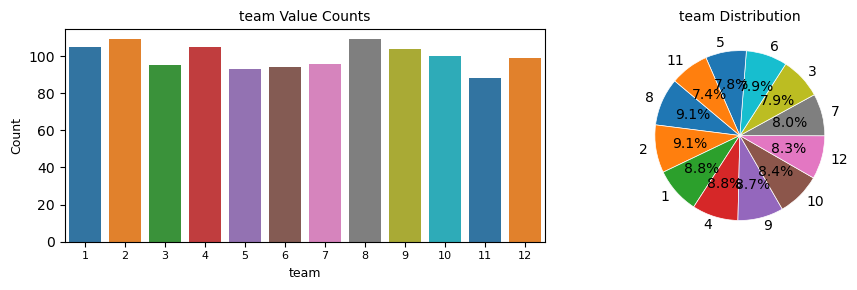

--------------------------------------------------
Univariate Analysis for Feature: no_of_style_change


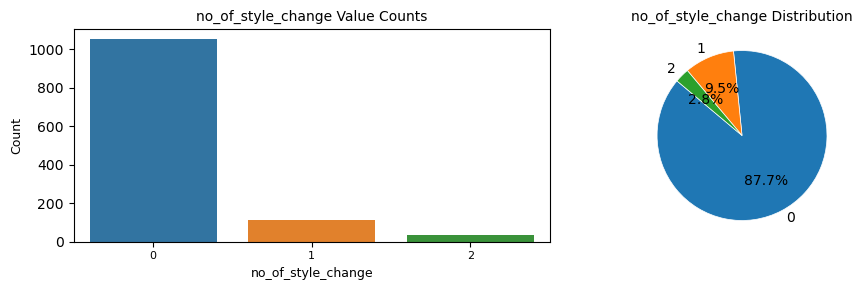

--------------------------------------------------


In [36]:
def univariate_analysis(df, categorical_features):
    for feature in categorical_features:
        print(f"Univariate Analysis for Feature: {feature}")
        
        # Create a figure with 2 subplots in a row
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # Adjust figure size
        
        # Get the color palette
        palette = sns.color_palette("tab10", df[feature].nunique())

        # 1. Bar Plot
        sns.countplot(x=feature, data=df, palette=palette, ax=axes[0])
        axes[0].set_title(f"{feature} Value Counts", fontsize=10)
        axes[0].set_xlabel(feature, fontsize=9)
        axes[0].set_ylabel("Count", fontsize=9)
        axes[0].tick_params(axis='x', labelsize=8)

        # 2. Pie Chart
        df[feature].value_counts().plot(
            kind='pie', 
            colors=palette, 
            autopct='%1.1f%%', 
            ax=axes[1], 
            startangle=140, 
            wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'}
        )
        axes[1].set_ylabel('')  # Hide y-axis label
        axes[1].set_title(f"{feature} Distribution", fontsize=10)

        plt.tight_layout()
        plt.show()
        print("-" * 50)

univariate_analysis(df, categorical_features)

#### Distribution of Categorical features

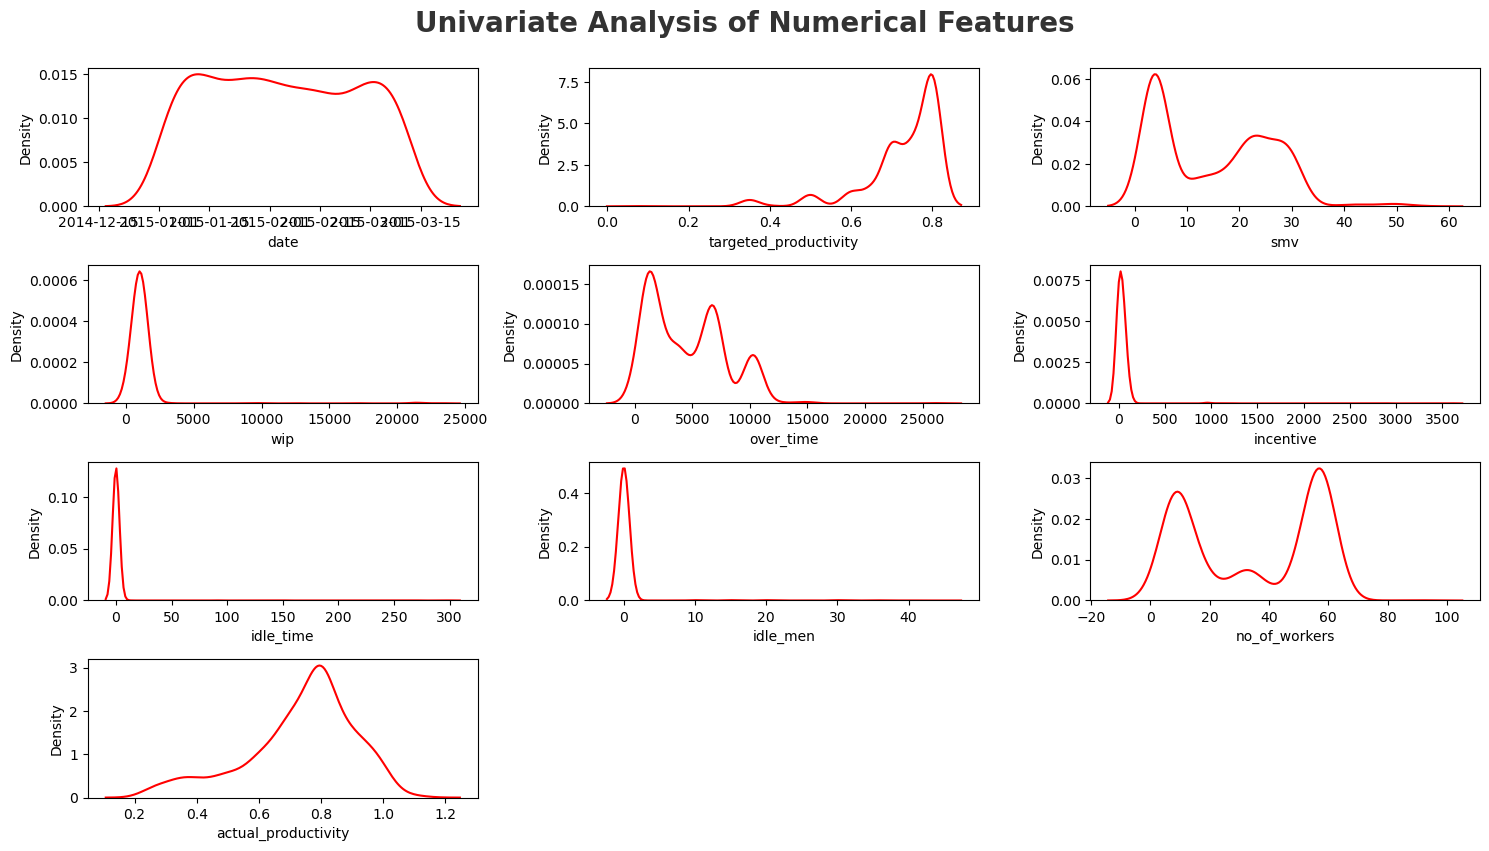

In [38]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='red')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

### Multivariate Analysis

In [40]:
# Multivariate analysis is the analysis of more than one variable
# Check Multicollinearity in Numerical features

numeric_features 
type(numeric_features)
numeric_features[1:]

['targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_workers',
 'actual_productivity']

In [41]:
df[(numeric_features[1:])].corr()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.084288,0.421594
smv,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.912176,-0.122089
wip,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,0.030383,0.131147
over_time,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.734164,-0.054206
incentive,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,0.049222,0.076538
idle_time,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,0.058049,-0.080851
idle_men,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.106946,-0.181734
no_of_workers,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,1.000000,-0.057991
actual_productivity,0.421594,-0.122089,0.131147,-0.054206,0.076538,-0.080851,-0.181734,-0.057991,1.000000


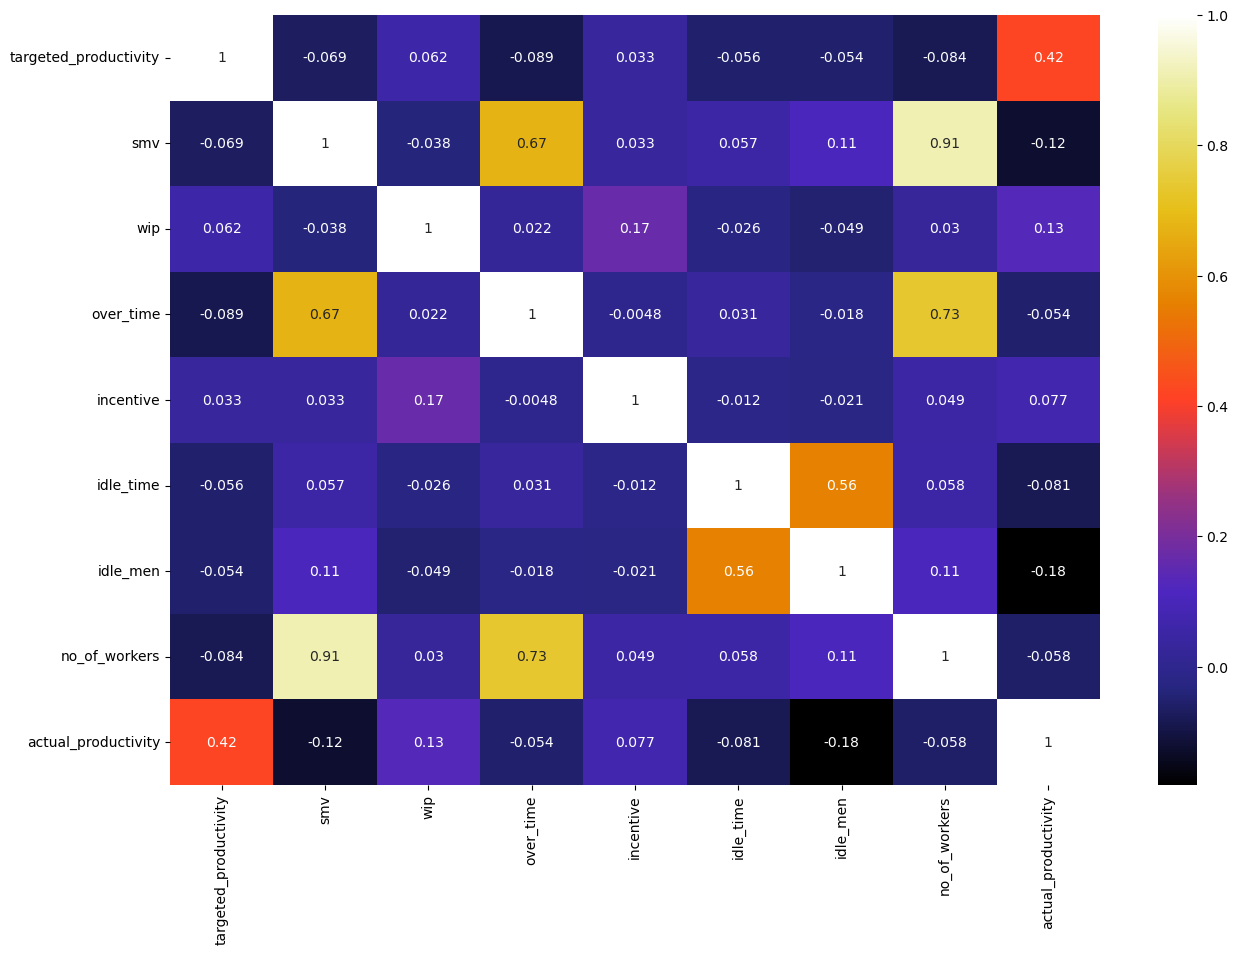

In [42]:
plt.figure(figsize = (15,10))
sns.heatmap(df[(numeric_features[1:])].corr(), cmap="CMRmap", annot=True)
plt.show()


Actual and target productivyt seems to be highly correlated with 0.42 positive correlation which indicates most of them time the target is meat so we'll be taking either one of them to compare with others columns. 
TargetlProductivity has string positive realtion with smv and medium positive with wip
The date, smv and idle_men also has medium positive correlation with TargetlProductivity
overtime and smv has strong positive correaltion
no_of_workers and over time has strong positive correaltion
ilde_time and Idle_men has postiive ccorrelation of 0.56.

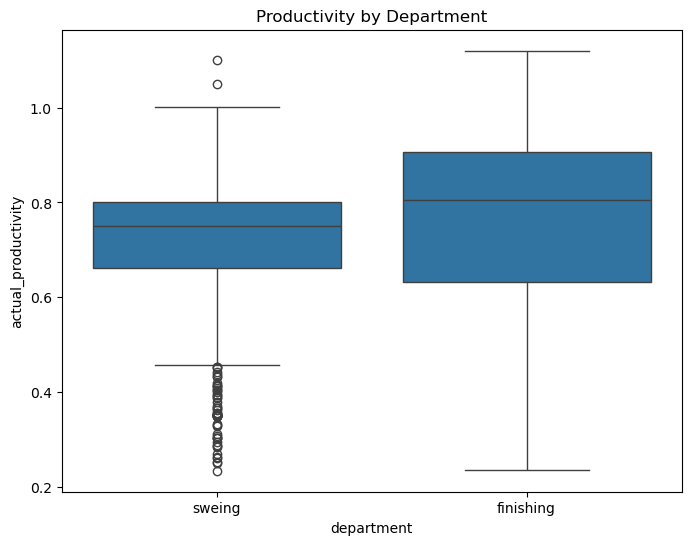

In [44]:
# Bar plots for categorical features
categorical_columns = ['department', 'team', 'quarter', 'day']

# Boxplot of productivity by department
plt.figure(figsize=(8, 6))
sns.boxplot(x='department', y='actual_productivity', data=df)
plt.title('Productivity by Department')
plt.show()

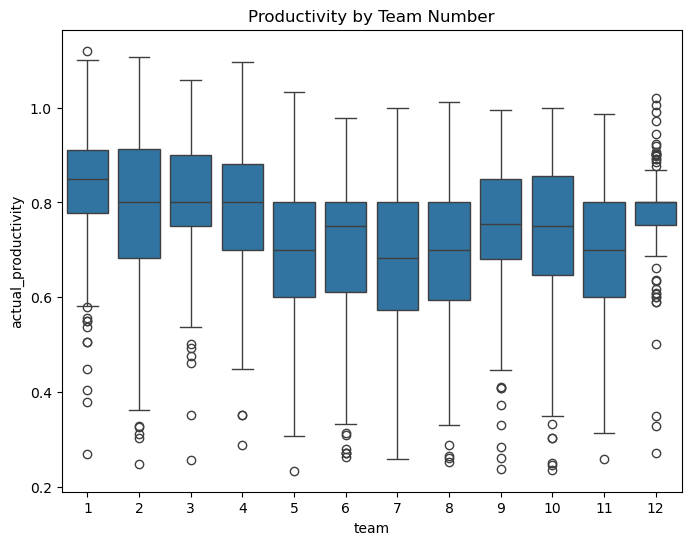

In [45]:
# Boxplot of productivity by team number
plt.figure(figsize=(8, 6))
sns.boxplot(x='team', y='actual_productivity', data=df)
plt.title('Productivity by Team Number')
plt.show()

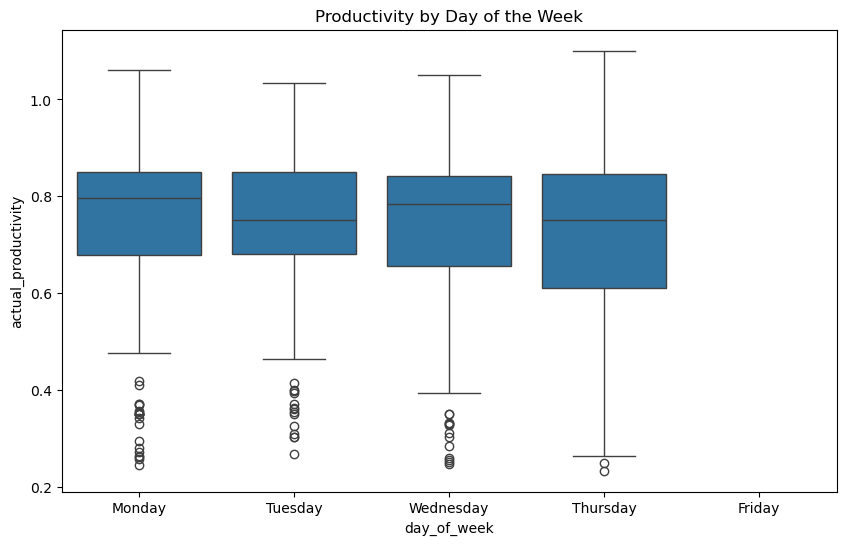

In [47]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

# Extract additional time-based features
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month

# Boxplot of productivity by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='actual_productivity', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Productivity by Day of the Week')
plt.show()


#### Impact Of WIP on Actual Productivity 

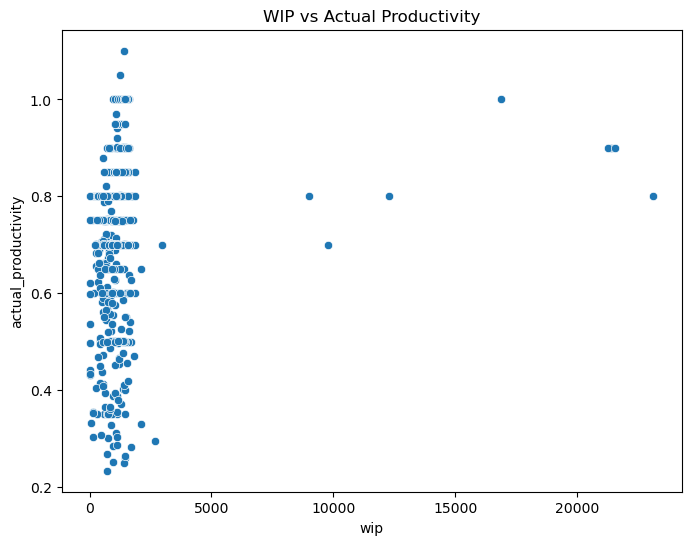

In [49]:
# Scatter plot between WIP and actual productivity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='wip', y='actual_productivity', data=df)
plt.title('WIP vs Actual Productivity')
plt.show()

<Axes: xlabel='department', ylabel='wip'>

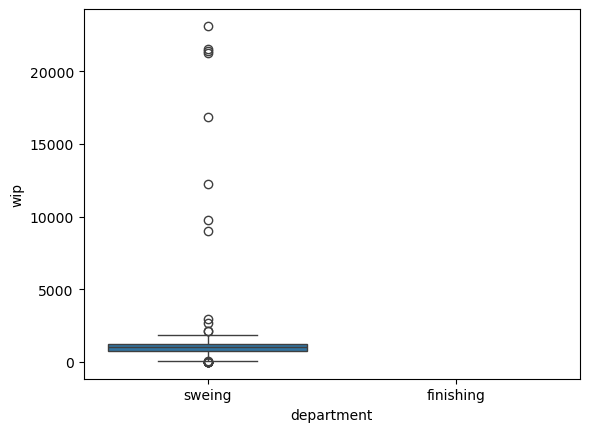

In [50]:
sns.boxplot(x='department',y='wip',data=df)

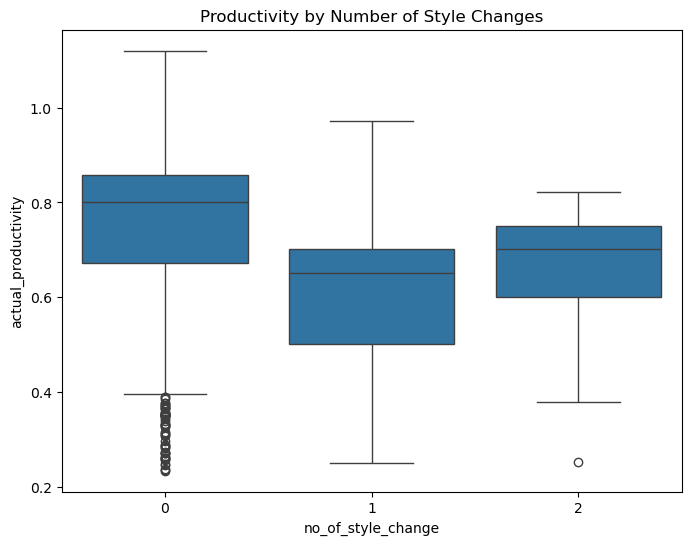

In [51]:
# Boxplot of productivity by number of style changes
plt.figure(figsize=(8, 6))
sns.boxplot(x='no_of_style_change', y='actual_productivity', data=df)
plt.title('Productivity by Number of Style Changes')
plt.show()

### Impact of Overtime and Incentives on Actual Productivity

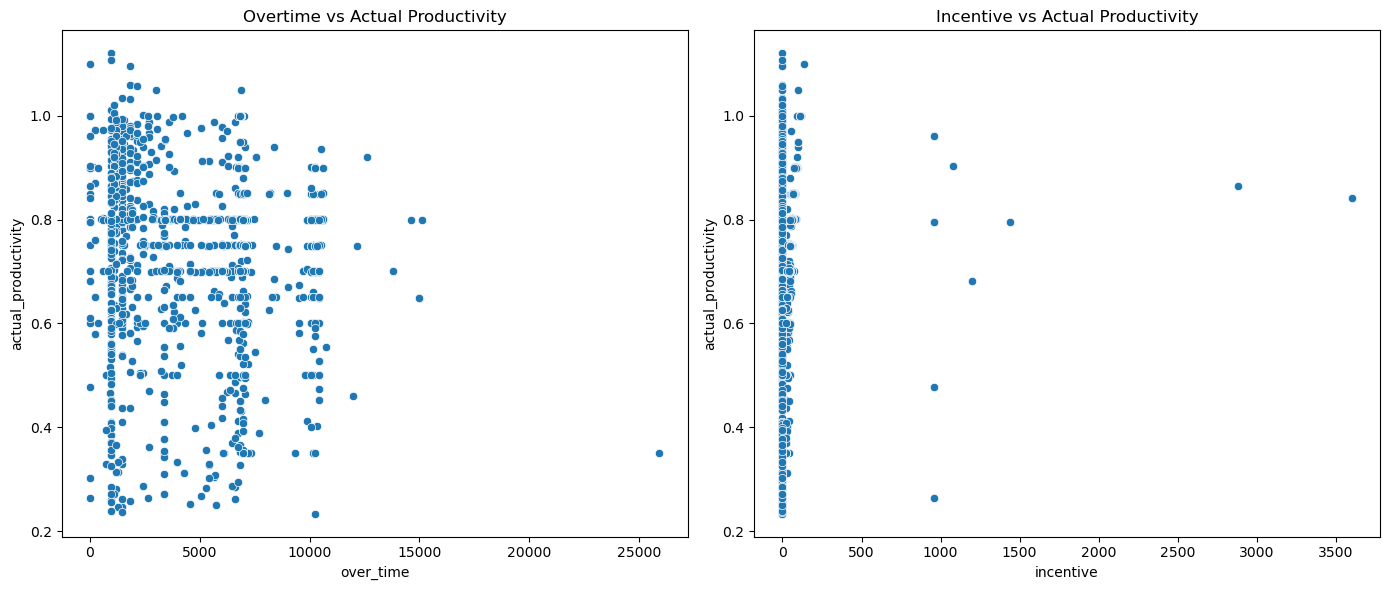

In [55]:
plt.figure(figsize=(14, 6)) 

# Scatter plot for overtime vs actual productivity
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.scatterplot(x='over_time', y='actual_productivity', data=df)
plt.title('Overtime vs Actual Productivity')

# Scatter plot for incentive vs actual productivity
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.scatterplot(x='incentive', y='actual_productivity', data=df)
plt.title('Incentive vs Actual Productivity')

# Show the plots
plt.tight_layout()  
plt.show()


Increase in Overtiem descrease the actual productivity. Zero incentive shows higher actual productivyt but it's does not exactly measn that with lower incntive the productivity increases. we can comment  into this but only after undersatanding business knowledge in more detauls. 

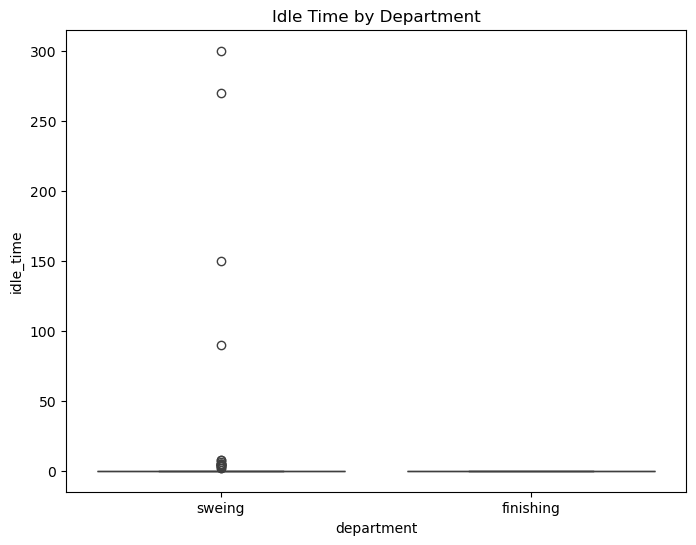

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='department', y='idle_time', data=df)
plt.title('Idle Time by Department')
plt.show()


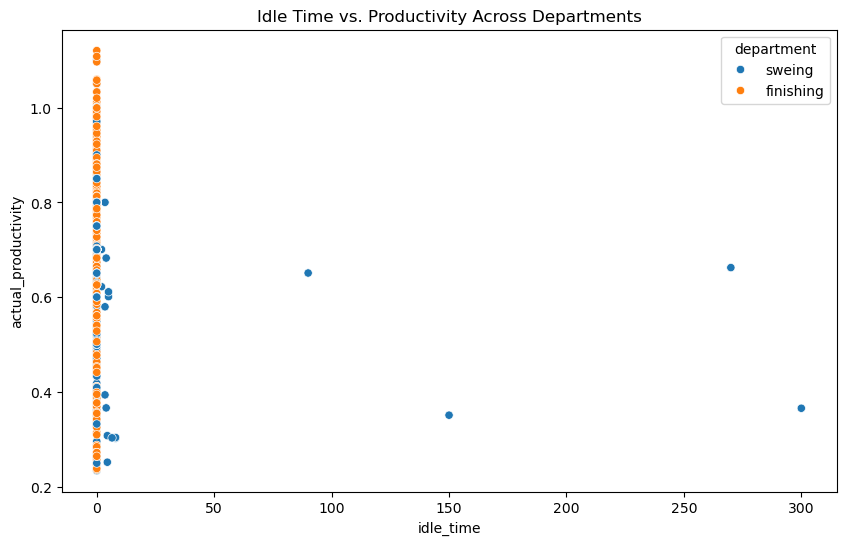

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idle_time', y='actual_productivity', hue='department', data=df)
plt.title('Idle Time vs. Productivity Across Departments')
plt.show()


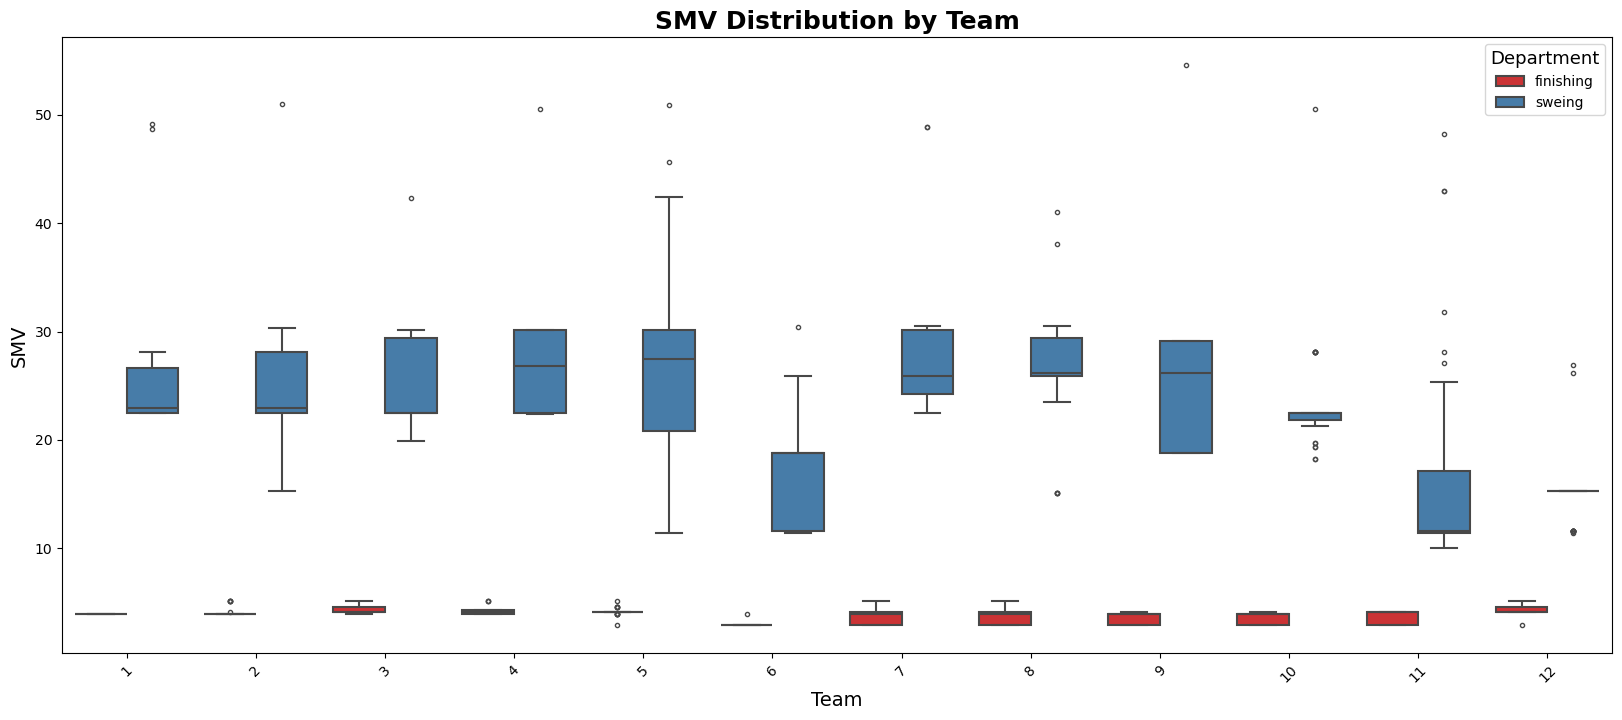

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))  # Adjusted size for a more balanced layout
palette = "Set1"  # Changed palette for a different color scheme

sns.boxplot(x="team", y="smv", hue="department", data=df,
            palette=palette, fliersize=3, linewidth=1.5) 

plt.title('SMV Distribution by Team', fontsize=18, fontweight='bold') 
plt.xlabel('Team', fontsize=14)
plt.ylabel('SMV', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Department', title_fontsize='13')

plt.show()


<Axes: xlabel='no_of_workers', ylabel='smv'>

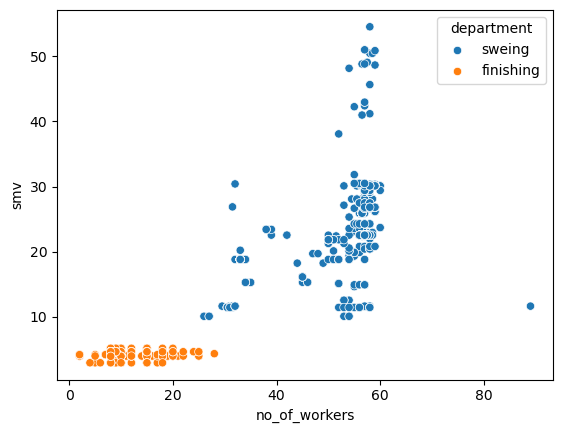

In [66]:
sns.scatterplot(data=df, x="no_of_workers", y="smv", hue="department")


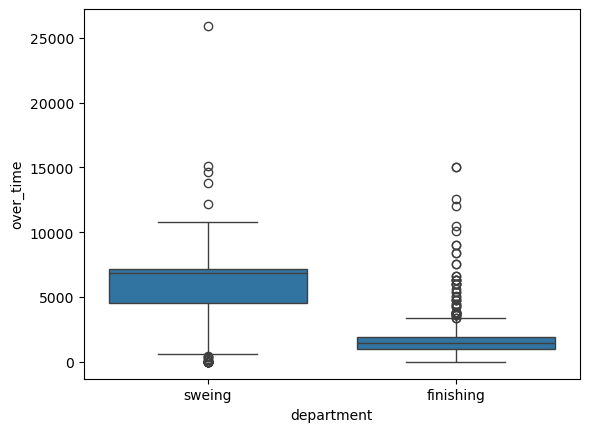

In [69]:
sns.boxplot(x='department',y='over_time',data=df)
plt.show()

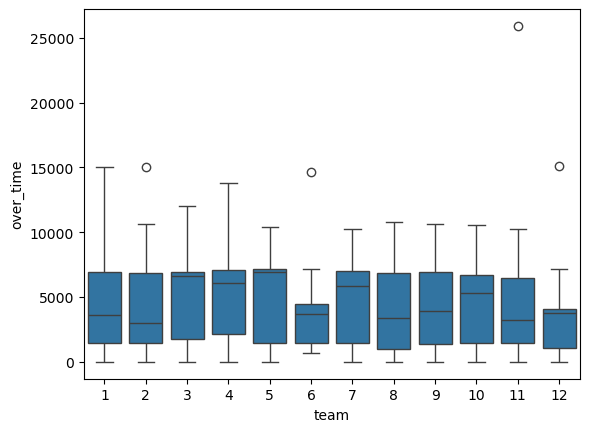

In [70]:
sns.boxplot(x='team',y='over_time',data=df)
plt.show()

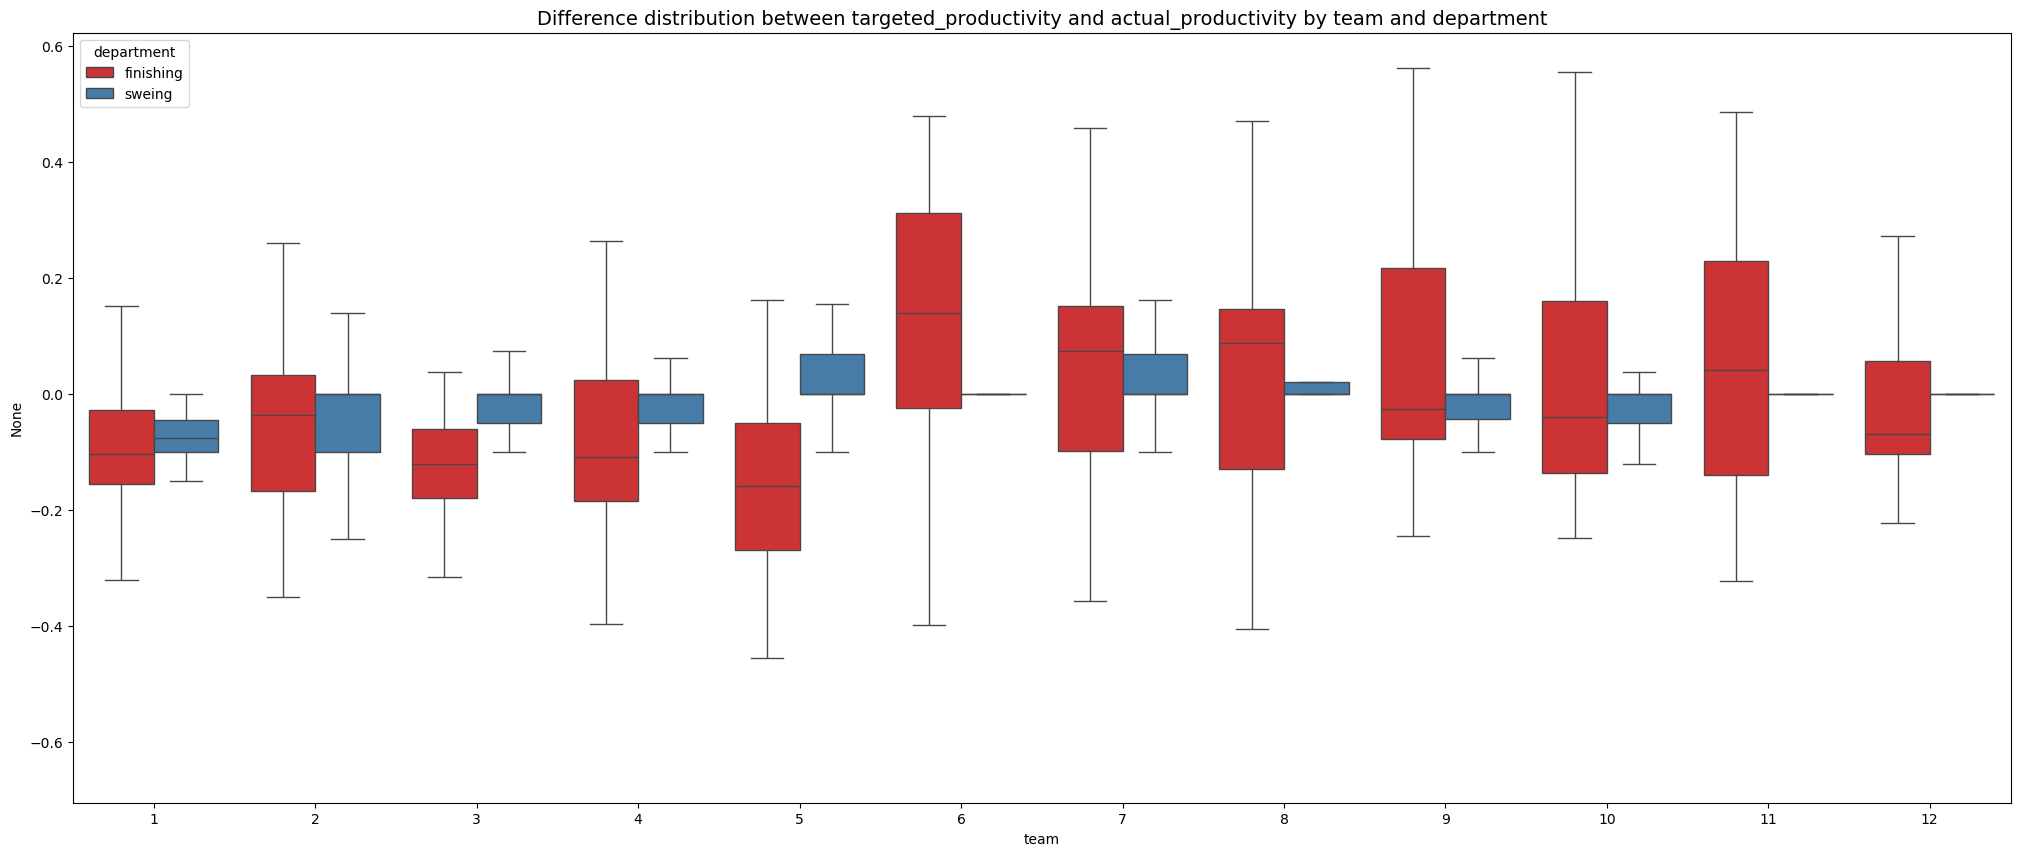

In [72]:
plt.figure(figsize=(25, 10))
palette = "Set1"

sns.boxplot(x = 'team', y = df.targeted_productivity-df.actual_productivity, data = df,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

# FEATURE ENGINEERING

#### Handling Missing Values

In [78]:
imputer = SimpleImputer(strategy='median')

# Reshape the 'wip' column into a 2D array for the imputer
wip_values = df[['wip']]

# Fit the imputer and transform the 'wip' column to fill missing values
df['wip'] = imputer.fit_transform(wip_values)

Remaining missing values in 'wip': 0


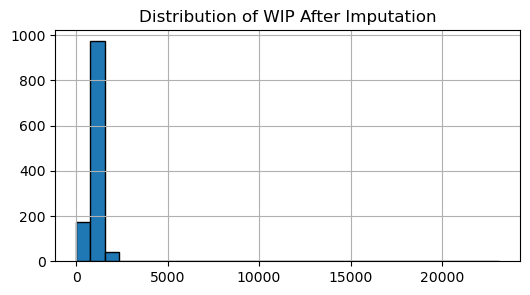

In [82]:
# Checking if there are any remaining missing values in the 'wip' column
remaining_missing_values = df['wip'].isnull().sum()
print(f"Remaining missing values in 'wip': {remaining_missing_values}")

# Visualize the 'wip' column after imputation (for example, a histogram)
df['wip'].hist(bins=30, edgecolor='black', figsize=(6, 3))
plt.title('Distribution of WIP After Imputation')
plt.show()


### Encoding Categorical Features

In [87]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'day_of_week', 'month'],
      dtype='object')

In [89]:
# Label Encoding

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'no_of_style_change'
df['no_of_style_change'] = label_encoder.fit_transform(df['no_of_style_change'].astype(str))


In [91]:
# One-Hot Encoding
def create_dummies(df, column_name):
    return pd.concat([df, pd.get_dummies(df[column_name], prefix=column_name)], axis=1)

# Apply One-Hot Encoding to the relevant columns
columns_to_encode = ['department', 'day', 'team', 'quarter']
for col in columns_to_encode:
    df = create_dummies(df, col)

df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'day_of_week', 'month', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5'],
      dtype='object')

### Creating the Target Variable

In [94]:
# Creating the 'productivity_label' target variable based on the difference between actual_productivity and target_productivity
df['productivity_label'] = df['actual_productivity'] - df['targeted_productivity']

# Classify performance and assign numeric values (-1 for underperformed , 0 for expected , 1 for overperformed)
df['productivity_label'] = df['productivity_label'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))

# Display the updated dataframe
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,team_9,team_10,team_11,team_12,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,productivity_label
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,...,False,False,False,False,True,False,False,False,False,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,...,False,False,False,False,True,False,False,False,False,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,...,False,False,True,False,True,False,False,False,False,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,...,False,False,False,True,True,False,False,False,False,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,...,False,False,False,False,True,False,False,False,False,1


productivity_label
 1    869
-1    322
 0      6
Name: count, dtype: int64


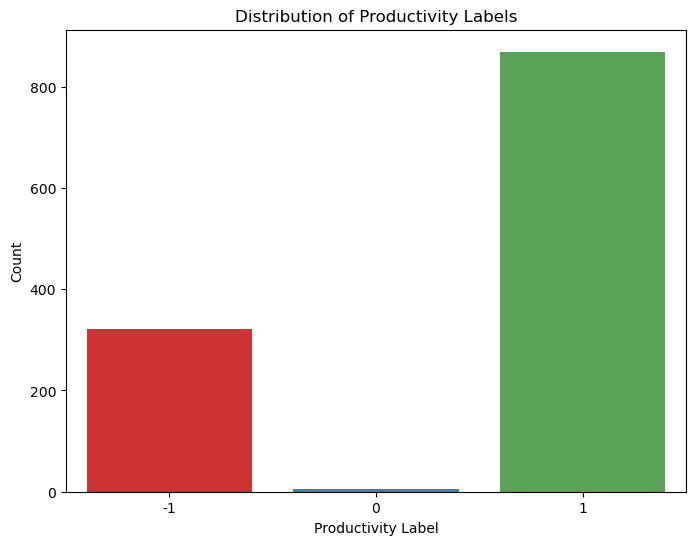

In [96]:
# Check the distribution of the 'productivity_label' column
label_counts = df['productivity_label'].value_counts()
print(label_counts)

# Visualize the distribution of the labels
plt.figure(figsize=(8, 6))
sns.countplot(x='productivity_label', data=df, palette='Set1')
plt.title('Distribution of Productivity Labels')
plt.xlabel('Productivity Label')
plt.ylabel('Count')
plt.show()


### Addressing Class Imbalance with SMOTE

1. **Class Imbalance Handling:**
   - The original `productivity_label` column had three classes (`1.0`, `0.0`, `-1.0`), with the `0.0` class having very few samples, leading to a highly imbalanced dataset.
   - To address this, the problem was simplified into a binary classification:
     - `1` represents both the original `1.0` (overperformed) and `0.0` (expected).
     - `-1` remains unchanged for underperformance.

productivity_label
 1    875
-1    322
Name: count, dtype: int64


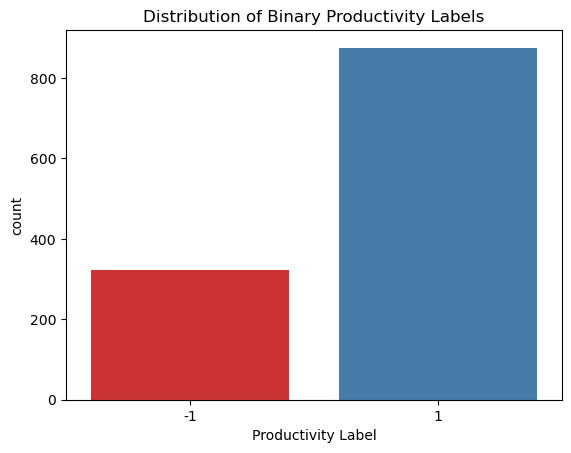

In [100]:
# Convert the 3-class 'productivity_label' into a binary classification problem
df['productivity_label'] = df['productivity_label'].apply(lambda x: -1 if x == -1 else 1)

# Display the value counts of the new target variable
print(df['productivity_label'].value_counts())

# Plot the distribution of the binary target variable
ax = sns.countplot(x='productivity_label', data=df, palette='Set1')
plt.xlabel('Productivity Label')
plt.title('Distribution of Binary Productivity Labels')
plt.show()

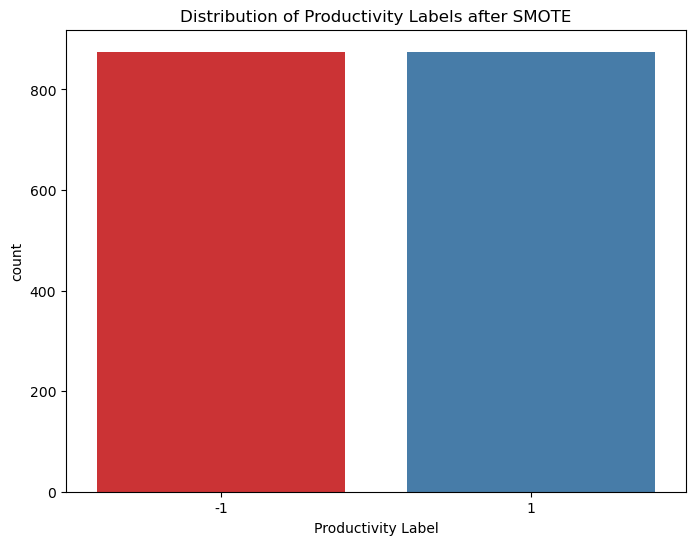

In [102]:
from imblearn.over_sampling import SMOTE
# Drop unnecessary columns (especially dates or non-numerical types)
df1 = df.drop(['quarter', 'department', 'day', 'team'], axis=1)

# Ensure datetime columns are dropped or converted if present
df1 = df1.select_dtypes(include=['int64', 'float64', 'bool'])  
df1 = df1.apply(lambda x: x.astype(float) if x.dtypes == 'bool' else x) 

# Separate features and target variable
X = df1.drop('productivity_label', axis=1)
y = df1['productivity_label']

# Apply SMOTE to balance the classes
smt = SMOTE(random_state=42)
X_smote, y_smote = smt.fit_resample(X, y)

# Create a DataFrame for the SMOTE-processed data
df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['productivity_label'])], axis=1)

# Plot class distribution after SMOTE
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='productivity_label', data=df_smote, palette='Set1')
plt.xlabel('Productivity Label')
plt.title('Distribution of Productivity Labels after SMOTE')
plt.show()


### Data Preparation and Splitting

In [105]:
from sklearn.model_selection import train_test_split

columns = ['smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_workers', 
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change']

X = df[columns]
y = df['productivity_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=42)
print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)
print("------------------------------------")


Training set shape (X): (957, 33)
Testing set shape (X): (240, 33)
Training set shape (y): (957,)
Testing set shape (y): (240,)
------------------------------------


In [126]:
# Print all the features and their types
print("Features and their types:")
for feature in columns:
    print(f"{feature}: {X[feature].dtype}")

print("------------------------------------")

Features and their types:
smv: float64
wip: float64
over_time: int64
incentive: int64
idle_time: float64
idle_men: int64
no_of_workers: float64
quarter_Quarter1: bool
quarter_Quarter2: bool
quarter_Quarter3: bool
quarter_Quarter4: bool
quarter_Quarter5: bool
department_finishing: bool
department_sweing: bool
day_Monday: bool
day_Saturday: bool
day_Sunday: bool
day_Thursday: bool
day_Tuesday: bool
day_Wednesday: bool
team_1: bool
team_2: bool
team_3: bool
team_4: bool
team_5: bool
team_6: bool
team_7: bool
team_8: bool
team_9: bool
team_10: bool
team_11: bool
team_12: bool
no_of_style_change: int64
------------------------------------


### Scaling Dataset

In [108]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to training data and then to test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Feature Selection Using VarianceThreshold

Final selected features after VarianceThreshold: Index(['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_workers', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'no_of_style_change'],
      dtype='object')
Features removed: Index([], dtype='object')


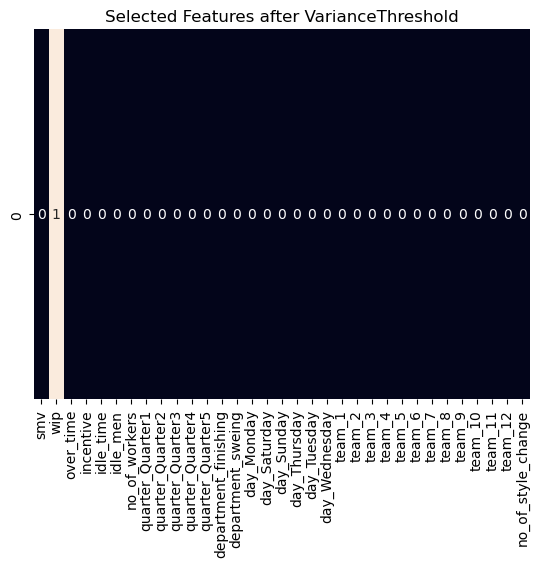

In [111]:
# Feature selection using VarianceThreshold
variance_selector = VarianceThreshold(threshold=0.0)  
X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)

# Get the feature indices selected by VarianceThreshold
selected_variance_features = variance_selector.get_support()  
selected_variance_columns = X.columns[selected_variance_features]

# Get the removed features
removed_features = X.columns[~selected_variance_features]

# Print the final selected and removed features
print(f"Final selected features after VarianceThreshold: {selected_variance_columns}")
print(f"Features removed: {removed_features}")

# Visualize the selected and removed features using a heatmap
new_features_boolean = np.isin(np.arange(X_train.shape[1]), selected_variance_features)
sns.heatmap(new_features_boolean.reshape(1, -1), cmap='rocket', cbar=False, annot=True, xticklabels=selected_variance_columns)
plt.title("Selected Features after VarianceThreshold")
plt.show()


# Applying Models And Accessing Results 

### Rationale Behind Algorithm Choice and Parameters  

#### **Random Forest Classifier:**  
Random Forest handles both numerical and categorical features well, making it suitable for this dataset. It captures non-linear relationships and interactions between features effectively. Setting `random_state=42` ensures consistent, reproducible results.

#### **Logistic Regression:**  
Logistic Regression provides a straightforward baseline for binary classification. It is useful for understanding linear relationships and is computationally efficient. The `max_iter=1000` parameter ensures the model converges properly with the scaled data.

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Random Forest Classifier
rf_basic = RandomForestClassifier(random_state=42)
rf_basic.fit(X_train, y_train)
rf_pred = rf_basic.predict(X_test)
print("Random Forest Basic Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

# Logistic Regression
lr_basic = LogisticRegression(random_state=42, max_iter=1000)
lr_basic.fit(X_train, y_train)
lr_pred = lr_basic.predict(X_test)
print("\nLogistic Regression Basic Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print(classification_report(y_test, lr_pred))

Random Forest Basic Results:
Accuracy: 0.8208333333333333
              precision    recall  f1-score   support

          -1       0.71      0.54      0.61        63
           1       0.85      0.92      0.88       177

    accuracy                           0.82       240
   macro avg       0.78      0.73      0.75       240
weighted avg       0.81      0.82      0.81       240


Logistic Regression Basic Results:
Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

          -1       0.57      0.33      0.42        63
           1       0.79      0.91      0.85       177

    accuracy                           0.76       240
   macro avg       0.68      0.62      0.63       240
weighted avg       0.73      0.76      0.74       240



## Hyper Parameter Tuining

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Random Forest Hyperparameter Tuning
rf_random_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(randint(10, 50).rvs(5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_random_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42
)

rf_random_search.fit(X_train, y_train)

print("Best Random Forest Parameters:")
print(rf_random_search.best_params_)
print(f"Best CV Score: {rf_random_search.best_score_:.4f}")

# Logistic Regression Hyperparameter Tuning
lr_random_grid = {
    'C': uniform(0.001, 10),  # Regularization strength
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg'],
    'max_iter': [500, 1000, 1500]
}

lr_random_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=lr_random_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42
)

lr_random_search.fit(X_train, y_train)

print("\nBest Logistic Regression Parameters:")
print(lr_random_search.best_params_)
print(f"Best CV Score: {lr_random_search.best_score_:.4f}")

Best Random Forest Parameters:
{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Best CV Score: 0.8172

Best Logistic Regression Parameters:
{'C': 3.746401188473625, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.7544


### Saving Trained Model

In [124]:
# Save the trained Random Forest model to a .pkl file
import joblib

# Save the Random Forest model
joblib.dump(rf_basic, 'garments_worker_productivity_model_trained.pkl')

print('Saving done')
# If you need to load the model for later use:
loaded_model = joblib.load('garments_worker_productivity_model_trained.pkl')

Saving done


In [128]:
### Checking for which values results was postive or negative : 

In [132]:
predictions = rf_basic.predict(X_test)

# Create a DataFrame to store the test features along with the predictions
results = pd.DataFrame(X_test, columns=columns)  # 'columns' should be your feature column names
results['prediction'] = predictions
results['actual'] = y_test  # If you have actual labels for comparison

# Filter the data where the prediction is 0 or 1
pred_zero = results[results['prediction'] == 0]
pred_one = results[results['prediction'] == 1]

# Display or analyze the results
print("Predictions where value is 0:")
print(pred_zero)
print("\nPredictions where value is 1:")
print(pred_one)


Predictions where value is 0:
Empty DataFrame
Columns: [smv, wip, over_time, incentive, idle_time, idle_men, no_of_workers, quarter_Quarter1, quarter_Quarter2, quarter_Quarter3, quarter_Quarter4, quarter_Quarter5, department_finishing, department_sweing, day_Monday, day_Saturday, day_Sunday, day_Thursday, day_Tuesday, day_Wednesday, team_1, team_2, team_3, team_4, team_5, team_6, team_7, team_8, team_9, team_10, team_11, team_12, no_of_style_change, prediction, actual]
Index: []

[0 rows x 35 columns]

Predictions where value is 1:
          smv       wip  over_time  incentive  idle_time  idle_men  \
0    0.702203 -0.288103   0.166251  -0.226881  -0.054956 -0.113471   
1   -0.314191 -0.066292  -0.030687   0.057552  -0.054956 -0.113471   
5    1.394119 -0.459314  -1.337644  -0.226881  -0.054956 -0.113471   
8    0.701289  0.118782   1.697001  -0.078976  -0.054956 -0.113471   
9    0.360358  0.072340   0.524322   0.029109  -0.054956 -0.113471   
..        ...       ...        ...        

In [115]:
# Apply Best Parameters for Random Forest
best_rf = RandomForestClassifier(random_state=42, **rf_random_search.best_params_)
best_rf.fit(X_train, y_train)
rf_best_pred = best_rf.predict(X_test)

# Apply Best Parameters for Logistic Regression
best_lr = LogisticRegression(random_state=42, **lr_random_search.best_params_)
best_lr.fit(X_train, y_train)
lr_best_pred = best_lr.predict(X_test)


### Visualizing results:

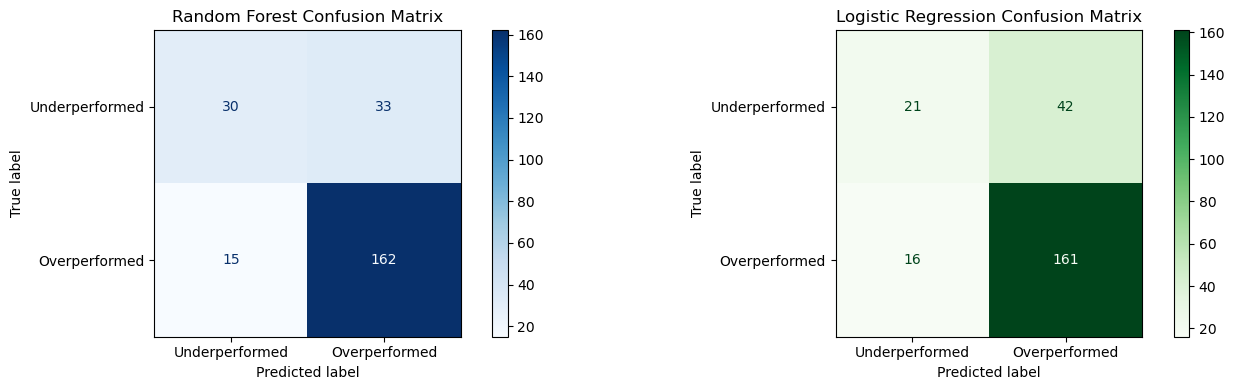

Random Forest Classification Report:
                precision    recall  f1-score   support

Underperformed       0.67      0.48      0.56        63
 Overperformed       0.83      0.92      0.87       177

      accuracy                           0.80       240
     macro avg       0.75      0.70      0.71       240
  weighted avg       0.79      0.80      0.79       240


Logistic Regression Classification Report:
                precision    recall  f1-score   support

Underperformed       0.57      0.33      0.42        63
 Overperformed       0.79      0.91      0.85       177

      accuracy                           0.76       240
     macro avg       0.68      0.62      0.63       240
  weighted avg       0.73      0.76      0.74       240



In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create a side-by-side plot
plt.figure(figsize=(14, 4))

true_label = ['Underperformed', 'Overperformed']

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay.from_predictions(
   y_test, 
   rf_best_pred, 
   cmap='Blues',
   display_labels=true_label,
   ax=plt.gca()
)
plt.title('Random Forest Confusion Matrix')

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay.from_predictions(
   y_test, 
   lr_best_pred, 
   cmap='Greens',
   display_labels=true_label,
   ax=plt.gca()
)
plt.title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

# Print Classification Reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_best_pred, target_names=true_label))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_best_pred, target_names=true_label))

## Cross Perfromace Analysis

Performance Metrics Comparison:
Accuracy: Random Forest = 0.8000, Logistic Regression = 0.7583
Precision: Random Forest = 0.7877, Logistic Regression = 0.7339
Recall: Random Forest = 0.8000, Logistic Regression = 0.7583
F1 Score: Random Forest = 0.7882, Logistic Regression = 0.7352


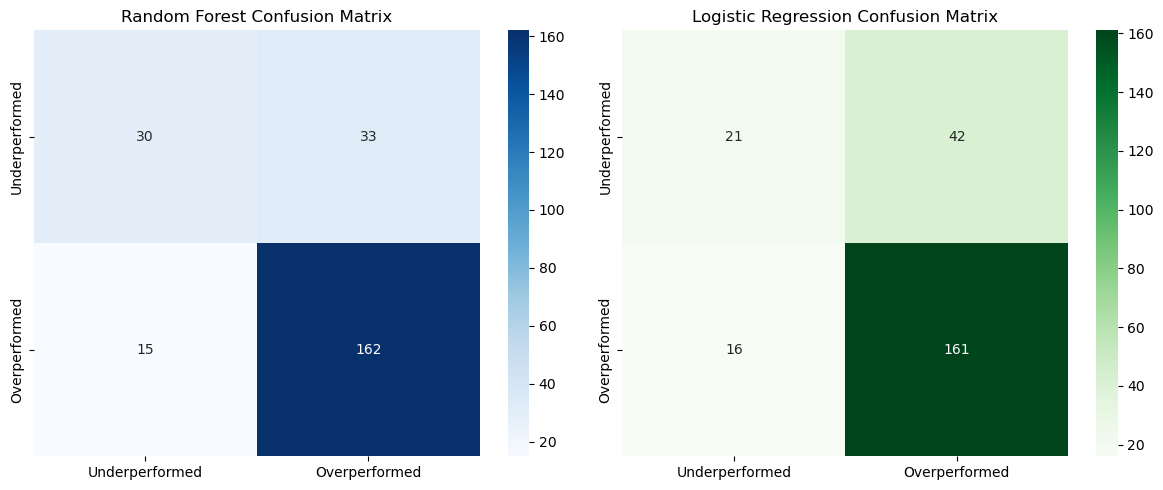

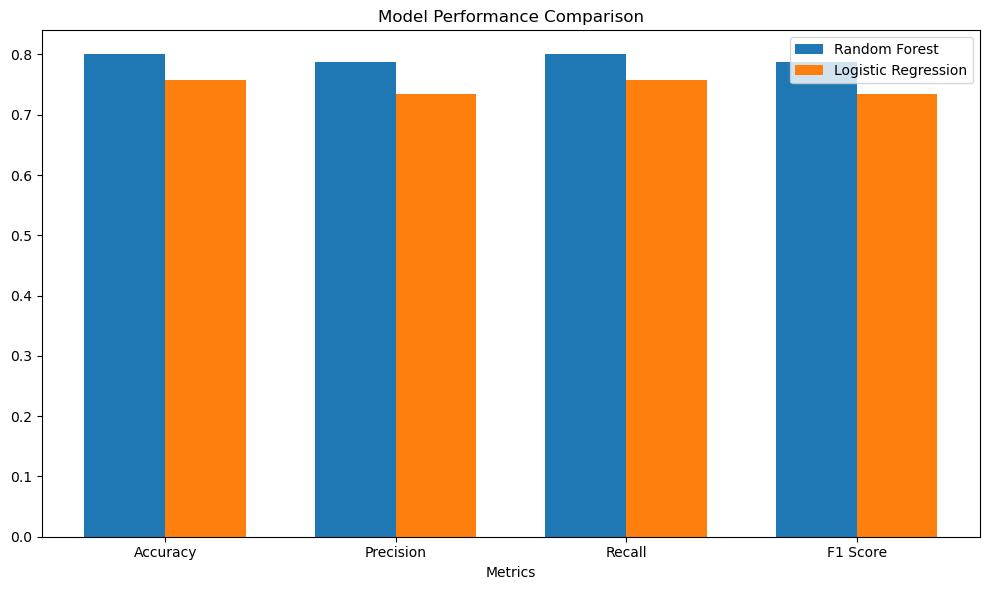

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report
)

# Performance Comparison Function
def compare_models(y_true, y_pred_rf, y_pred_lr, true_labels):
    # Metrics Calculation
    metrics = {
        'Accuracy': [
            accuracy_score(y_true, y_pred_rf),
            accuracy_score(y_true, y_pred_lr)
        ],
        'Precision': [
            precision_score(y_true, y_pred_rf, average='weighted'),
            precision_score(y_true, y_pred_lr, average='weighted')
        ],
        'Recall': [
            recall_score(y_true, y_pred_rf, average='weighted'),
            recall_score(y_true, y_pred_lr, average='weighted')
        ],
        'F1 Score': [
            f1_score(y_true, y_pred_rf, average='weighted'),
            f1_score(y_true, y_pred_lr, average='weighted')
        ]
    }

    # Print Metrics
    print("Performance Metrics Comparison:")
    for metric, values in metrics.items():
        print(f"{metric}: Random Forest = {values[0]:.4f}, Logistic Regression = {values[1]:.4f}")
    
    # Confusion Matrix
    plt.figure(figsize=(12, 5))

    # Random Forest Confusion Matrix
    plt.subplot(121)
    sns.heatmap(confusion_matrix(y_true, y_pred_rf), annot=True, fmt='d', cmap='Blues', 
                xticklabels=true_labels, yticklabels=true_labels)
    plt.title('Random Forest Confusion Matrix')

    # Logistic Regression Confusion Matrix
    plt.subplot(122)
    sns.heatmap(confusion_matrix(y_true, y_pred_lr), annot=True, fmt='d', cmap='Greens', 
                xticklabels=true_labels, yticklabels=true_labels)
    plt.title('Logistic Regression Confusion Matrix')

    plt.tight_layout()
    plt.show()

    # Bar Plot of Performance Metrics
    plt.figure(figsize=(10, 6))
    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, [v[0] for v in metrics.values()], width, label='Random Forest')
    plt.bar(x + width/2, [v[1] for v in metrics.values()], width, label='Logistic Regression')

    plt.xlabel('Metrics')
    plt.title('Model Performance Comparison')
    plt.xticks(x, list(metrics.keys()))
    plt.legend()
    plt.tight_layout()
    plt.show()

# True Labels for confusion matrix
true_labels = ['Underperformed', 'Overperformed']

# Call the comparison function with predicted results
compare_models(y_test, rf_best_pred, lr_best_pred, true_labels)